## Ejemplo Clase 2
## Filtrar Ruido blanco de una señal

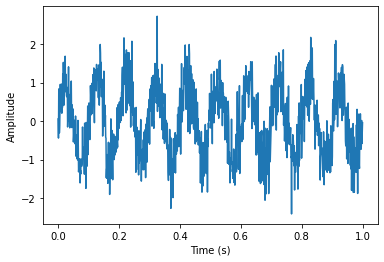

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# se crea una señal sinusoidal de frecuencia 10Hz
# que se sumará con un ruido blanco gaussiano generado por np.random.randn(). 
# El factor de 0.5 controla la intensidad del ruido.
t = np.linspace(0, 1, 1000)
f = 10
signal = np.sin(2 * np.pi * f * t) + 0.5 * np.random.randn(len(t))

plt.plot(t, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


### Ahora, podemos utilizar un filtro pasa bajos para eliminar el ruido blanco de la señal. 

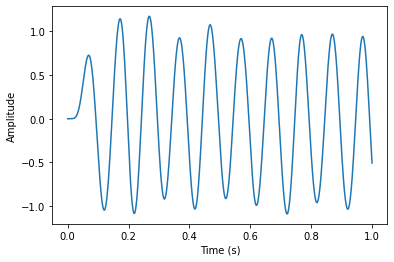

In [2]:
from scipy.signal import butter, lfilter

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Definimos los parámetros del filtro
cutoff = 15  # Frecuencia de corte del filtro en Hz
fs = 1000  # Frecuencia de muestreo de la señal en Hz
order = 6  # Orden del filtro

# Aplicamos el filtro a la señal
filtered_signal = butter_lowpass_filter(signal, cutoff, fs, order)

# Graficamos la señal filtrada
plt.plot(t, filtered_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()